In [1]:
# predict salary of person on basis of years of experience 

import pandas as pd
import numpy as np
import os 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [13]:
#import dataset from local machine
data= pd.read_csv(r"C:\Users\Prekshya\Desktop\Salary_dataset.csv")
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [14]:
data.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [15]:
data.shape

(30, 3)

In [16]:
data.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [18]:
data.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [20]:
# preprocessing- dropping unnamed 0 column
data.drop(['Unnamed: 0'], axis= 1, inplace= True)

In [21]:
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


<Axes: xlabel='YearsExperience', ylabel='Salary'>

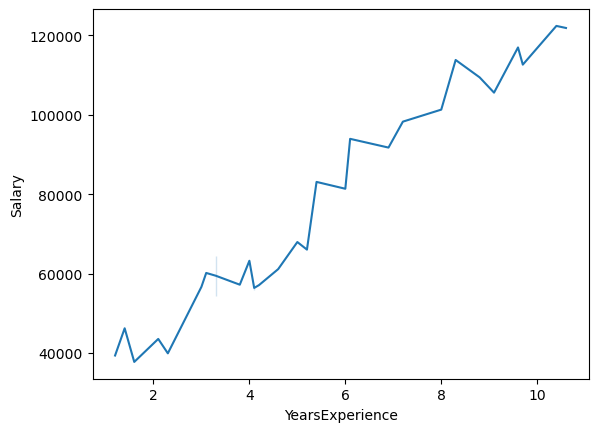

In [24]:
#Exploratory Data Analysis
sns.lineplot(data, x= "YearsExperience", y="Salary")

<Axes: xlabel='YearsExperience', ylabel='Salary'>

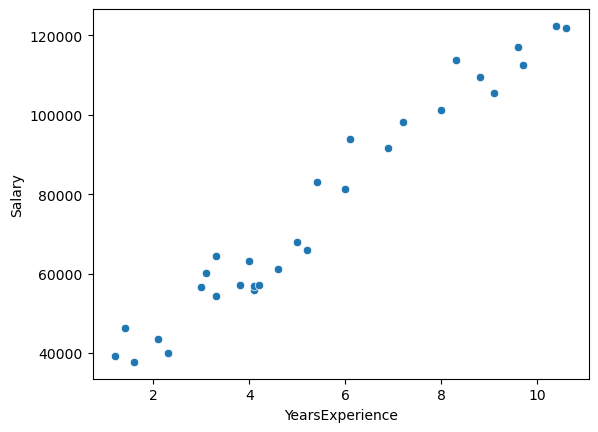

In [25]:
sns.scatterplot(data, x="YearsExperience", y="Salary")

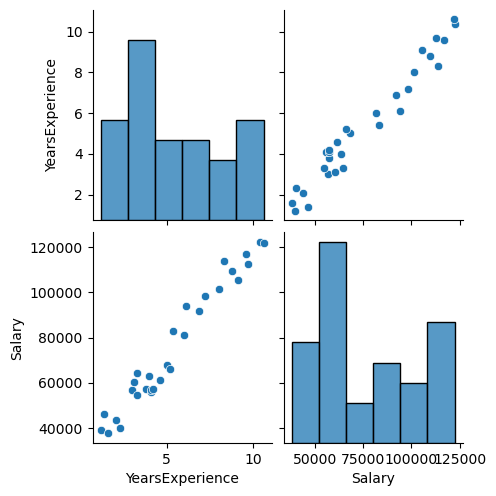

In [26]:
sns.pairplot(data)

<Axes: xlabel='YearsExperience', ylabel='Count'>

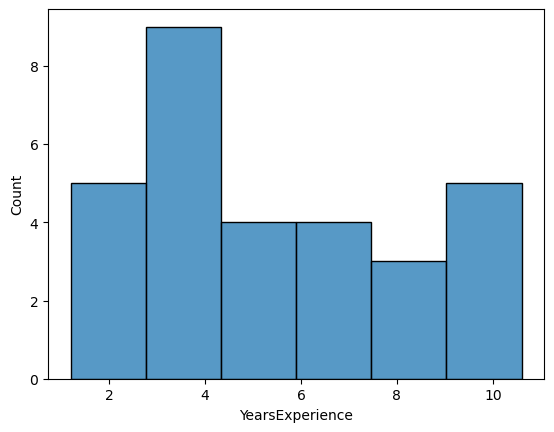

In [28]:
sns.histplot(data["YearsExperience"])

<Axes: xlabel='Salary', ylabel='Count'>

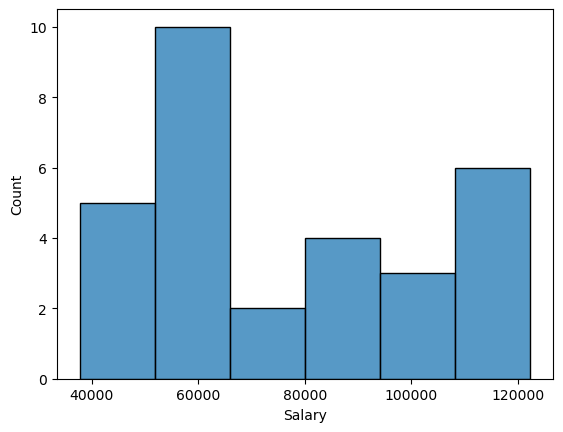

In [29]:
sns.histplot(data["Salary"])

<Axes: >

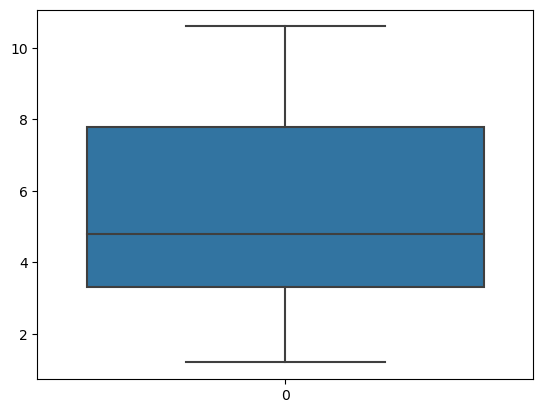

In [30]:
sns.boxplot(data["YearsExperience"])

<Axes: >

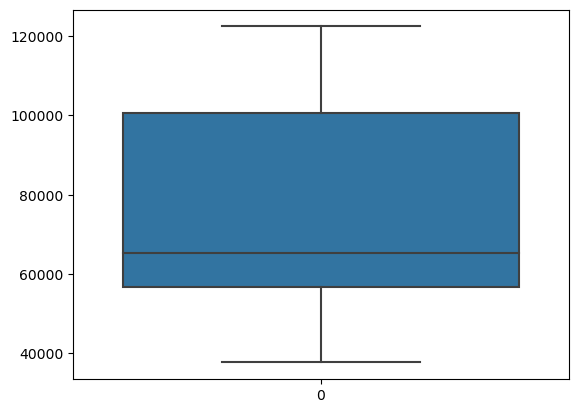

In [31]:
sns.boxplot(data["Salary"])

In [32]:
#feature engineering  - handle NAN values, outliers, scaling
#copy dataframe to keep original intact
data_scaled= data.copy()

In [42]:
#feature scaling 
min_max= MinMaxScaler()
data.head()

,YearsExperience,Salary,ScaledYearsExperience
0,1.2,39344.0,0.000000
1,1.4,46206.0,0.021277
2,1.6,37732.0,0.042553
3,2.1,43526.0,0.095745
4,2.3,39892.0,0.117021


In [40]:
min_max_yoe= min_max.fit_transform(data_scaled[["YearsExperience"]])
data.head()

,YearsExperience,Salary,ScaledYearsExperience
0,1.2,39344.0,0.000000
1,1.4,46206.0,0.021277
2,1.6,37732.0,0.042553
3,2.1,43526.0,0.095745
4,2.3,39892.0,0.117021


In [37]:
data["ScaledYearsExperience"]= min_max_yoe

In [39]:
#data.head()

,YearsExperience,Salary,ScaledYearsExperience
0,1.2,39344.0,0.000000
1,1.4,46206.0,0.021277
2,1.6,37732.0,0.042553
3,2.1,43526.0,0.095745
4,2.3,39892.0,0.117021


In [43]:
x= np.array(data['ScaledYearsExperience']).reshape(-1,1)
y=data['Salary']

In [44]:
#Train Test Split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2)

In [45]:
#model building - Linear Regression

linear_reg= LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [47]:

#slope

linear_reg.coef_

array([89130.13373569])

In [49]:
#Y-Intercept
linear_reg.intercept_

35278.42032992308

In [50]:

#predict test value
linear_reg.predict(x_test)

array([ 35278.42032992,  55190.47148364, 114926.6249448 ,  81739.87302193,
       107341.08164814,  67516.97934071])

In [52]:
#predict random value
linear_reg.predict([[100]])

array([8948291.79389927])

In [57]:
#evaluation metrics
r2_score(y_test, linear_reg.predict(x_test))

0.9356851426203712